In [1]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
PIC = Image.open("timg.jpeg", 'r')

In [3]:
piv_value = np.array(PIC)

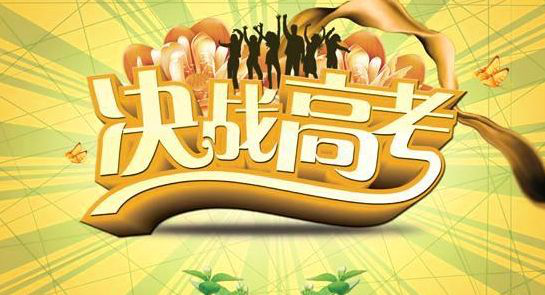

In [10]:
PIC

In [8]:
piv_value.shape

(295, 545, 3)

In [11]:
## svd 
u_r, sigma_R, v_r = np.linalg.svd(piv_value[:, :, 0])
u_g, sigma_G, v_g = np.linalg.svd(piv_value[:, :, 1])
u_b, sigma_B, v_b = np.linalg.svd(piv_value[:, :, 2])
sigma_r=np.diag(sigma_R)
sigma_g=np.diag(sigma_G)
sigma_b=np.diag(sigma_B)

In [26]:
K=200
R=np.rint(np.dot(np.dot(u_r[:,0:K],sigma_r[0:K,0:K]),v_r[0:K,:])).astype('uint8')
R[R<0]=0;R[R>255]=255
G=np.rint(np.dot(np.dot(u_g[:,0:K],sigma_g[0:K,0:K]),v_g[0:K,:])).astype('uint8')
G[G<0]=0;G[G>255]=255
B=np.rint(np.dot(np.dot(u_b[:,0:K],sigma_b[0:K,0:K]),v_b[0:K,:])).astype('uint8')
B[B<0]=0;B[B>255]=255
I= np.stack((R, G, B), axis=2)

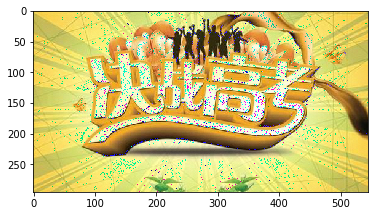

In [27]:
plt.imshow(I)
plt.show()

In [28]:
R

array([[246, 244, 243, ..., 240, 235, 224],
       [249, 250, 250, ..., 246, 245, 233],
       [222, 226, 230, ..., 239, 248, 234],
       ..., 
       [218, 215, 213, ..., 201, 201, 198],
       [206, 204, 205, ..., 199, 199, 198],
       [206, 202, 201, ..., 199, 198, 201]], dtype=uint8)

In [29]:
from sklearn.decomposition import PCA
n_components=200
pca=PCA(n_components=n_components)

In [30]:
R=piv_value[:, :,0]
G=piv_value[:, :,1]
B=piv_value[:, :,2]

In [31]:
R_pca=np.rint(pca.inverse_transform(pca.fit_transform(R))).astype('uint8')
G_pca=np.rint(pca.inverse_transform(pca.fit_transform(G))).astype('uint8')
B_pca=np.rint(pca.inverse_transform(pca.fit_transform(B))).astype('uint8')

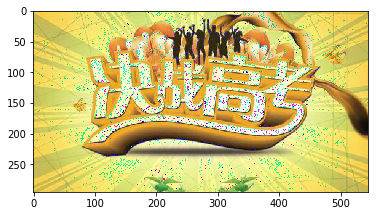

In [32]:
I= np.stack((R_pca, G_pca, B_pca), axis=2)
plt.imshow(I)
plt.show()